<a href="https://colab.research.google.com/github/TrunnMosby/Predictive-Maintenance-of-Wind-Turbine/blob/main/Gearbox_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# importing libraries
import pandas as pd
import numpy as np

In [26]:
# importing dataset
data=pd.read_csv('/content/Gearboxdata2 (1).csv')

In [27]:
data

,Unnamed: 0,Grd_RtrInvPhase2_Temp_Avg,Cont_VCP_ChokcoilTemp_Avg,Prod_LatestAvg_TotReactPwr,Rtr_RPM_Avg,Gear_Oil_Temp_Avg,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Unnamed: 8,Date
0,0,35,99,-212,5.7,44,647.1,47,NaN,2017-12-29T20:30:00+00:00
1,1,34,80,-1455,2.4,43,265.5,44,NaN,2017-12-29T20:30:00+00:00
2,2,33,92,-1958,2.6,44,293.1,46,NaN,2017-12-29T20:40:00+00:00
3,3,39,89,-1194,11.1,46,1248.8,48,NaN,2017-12-29T20:40:00+00:00
4,4,33,75,-1388,2.6,42,291.4,43,NaN,2017-12-29T20:40:00+00:00
...,...,...,...,...,...,...,...,...,...,...
209231,209231,42,95,-27963,14.3,55,1619.8,60,NaN,2017-05-31T10:50:00+00:00
209232,209232,33,67,-2105,0.0,46,0.0,46,NaN,2017-06-03T00:20:00+00:00
209233,209233,41,91,-30542,13.9,55,1565.7,64,NaN,2017-05-31T11:10:00+00:00
209234,209234,33,58,-2099,0.0,46,0.0,44,NaN,2017-06-03T00:50:00+00:00


In [28]:
data=data.drop('Unnamed: 8',axis=1)

In [29]:
import matplotlib.pyplot as plt

In [30]:
# Mahanabolis distance filteration
MD=pd.read_csv('/content/MD_newdata.csv')

In [31]:
# Merging both datasets
df= pd.merge(data,MD)

In [32]:
# Removing the null values
df=df.dropna()

In [33]:
df=df[df['Prod_LatestAvg_TotReactPwr']!=0]

In [34]:
df=df.drop('Date',axis=1)

In [35]:
# Filtering outliers
max_threshold=df['MD'].quantile(0.85)
min_threshold=df['MD'].quantile(0.15)

In [36]:
ftest=df[(df['MD']<max_threshold) & (df['MD']>min_threshold)]

In [37]:
ftest

,Unnamed: 0,Grd_RtrInvPhase2_Temp_Avg,Cont_VCP_ChokcoilTemp_Avg,Prod_LatestAvg_TotReactPwr,Rtr_RPM_Avg,Gear_Oil_Temp_Avg,Gen_RPM_Avg,Gear_Bear_Temp_Avg,MD
0,1,34,80,-1455,2.4,43,265.5,44,2.799417
1,2,33,92,-1958,2.6,44,293.1,46,3.030315
2,3,39,89,-1194,11.1,46,1248.8,48,3.707309
3,4,33,75,-1388,2.6,42,291.4,43,2.459624
4,5,39,82,-968,8.5,45,957.8,50,3.522508
...,...,...,...,...,...,...,...,...,...
209228,209229,43,103,-27968,14.5,53,1637.7,60,3.213454
209229,209230,34,48,-1480,0.0,45,0.0,44,3.425543
209230,209231,42,95,-27963,14.3,55,1619.8,60,4.709864
209232,209233,41,91,-30542,13.9,55,1565.7,64,6.503370


In [38]:
# Selecting input and output for training the model
features=ftest[['Grd_RtrInvPhase2_Temp_Avg', 'Cont_VCP_ChokcoilTemp_Avg',	'Prod_LatestAvg_TotReactPwr',	'Rtr_RPM_Avg',	'Gear_Oil_Temp_Avg',	'Gen_RPM_Avg'	]]
labels=ftest['Gear_Bear_Temp_Avg']

In [39]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(features)

In [40]:
# Spliting the data into 70% train and 30% test
xtrain=x_sc[:102505]
xtest=x_sc[102505:]
ytrain=labels[:102505]
ytest=labels[102505:]

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [42]:
# training the random forest model
gmodel=RandomForestRegressor()
gmodel.fit(xtrain,ytrain)
pred=gmodel.predict(xtest)
train_pred= gmodel.predict(xtrain)

In [43]:
# RMSE
print(np.sqrt(mse(pred,ytest)))

1.0822796414478666


In [44]:
#MAE
print((mae(pred,ytest)))

0.7787414155193456


<Figure size 1440x1440 with 0 Axes>

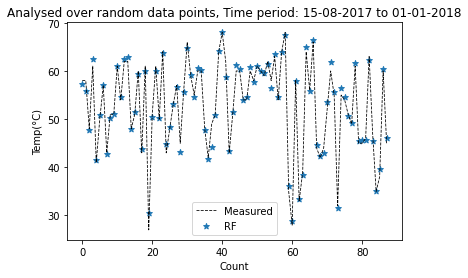

<Figure size 1440x1440 with 0 Axes>

In [45]:
# Testing the model over random data points
plt.plot([i for i in range(len(pred[::500]))],ytest[::500],linestyle='dashed',color='black',linewidth=0.8)

plt.scatter([i for i in range(len(pred[::500]))],pred[::500],marker='*')


plt.legend(['Measured','RF'])
plt.ylabel('Temp(°C)')
plt.xlabel('Count')
plt.title('Analysed over random data points, '+'Time period: 15-08-2017 to 01-01-2018')
plt.figure(figsize=(20, 20))

In [46]:
# Creating a dataframe to note the deviations
deviation=[]

for i,j in zip(pred,ytest):
  deviation.append(j-i)

In [47]:
f=pd.DataFrame({'Deviations':deviation})

In [48]:
f['Deviations_shift']=f['Deviations'].shift(1)

In [49]:
f['difference']=f['Deviations'].diff()

In [50]:
count= [i for i in range(len(ytest))]

In [51]:
f=f.dropna()

In [52]:
values=[]
for i in f['difference']:
  if(i>0):
    values.append(i)
  else:
    values.append(-1*i)

In [53]:
ucl=3* np.std(f['Deviations'])
lcl=-1*ucl

In [54]:
UCL=[]
for i in range(23000):
  UCL.append(ucl)

In [55]:
LCL=[]
for i in range(23000):
  LCL.append(lcl)

Text(0.5, 1.0, 'Predictions using RF for Gearbox failure (On x-axis:1440 units= 10 days)  Time period: 15-08-2017 to 01-01-2018')

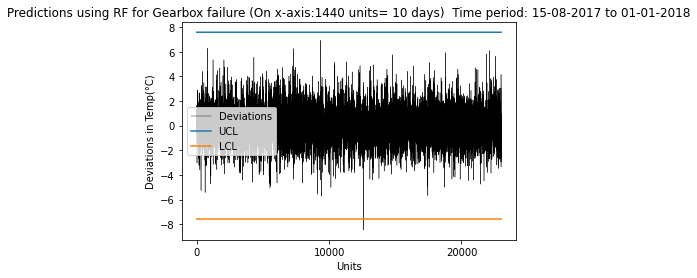

In [61]:
# Ploting Predctions for Gearbox failure
r=[i for i in f['Deviations'].iloc[12000:35000]]
plt.plot(r,color="black",linewidth=0.4)
plt.plot(UCL)
plt.plot(LCL)
plt.xticks(np.arange(0, len(r)+1, 10000))
plt.ylabel('Deviations in Temp(°C)')
plt.xlabel('Units')
plt.legend(['Deviations','UCL','LCL'])
plt.title('Predictions using RF for Gearbox failure '+ '(On x-axis:1440 units= 10 days)  '+'Time period: 15-08-2017 to 01-01-2018' )